# Analysis for once-through scenarios
This notebook provides analysis for all of the once-through fuel cycle scenarios that are included in 
Amanda Bachmann's dissertation. Analysis of each scenario includes the number of reactors deployed, the uranium resources, the SWU capacity, and the amount of waste produced. 

Scenarios are numbers as follows:
* 1: LWRs
* 2: MMR, no growth
* 3: Xe-100, no growth
* 4: Xe-100 and MMR, no growth
* 5: MMR and VOYGR, no growth
* 6: Xe-100 and VOYGR, no growth
* 7: Xe-100, MMR, and VOYGR, no growth
* 8: MMR, 1% growth
* 9: Xe-100, 1% growth
* 10: Xe-100 and MMR, 1% growth
* 11: MMR and VOYGR, 1% growth
* 12: Xe-100 and VOYGR, 1% growth
* 13: Xe-100, MMR, and VOYGR, 1% growth

Analysis of scenario 1 is performed separately, then the no growth scenarios are all analyzed together, followed by the 1% growth scenarios. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cymetric as cym
import transition_metrics as tm

In [2]:
# enrichment assays
leu_p = 0.043
mmr_p = 0.13
xe_p = 0.155
voygr_p = 0.0409
x_f = 0.00711
x_t = 0.002

## Scenario 1

In [3]:
s1_outfile = "../outputs/united_states_2020.sqlite"

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


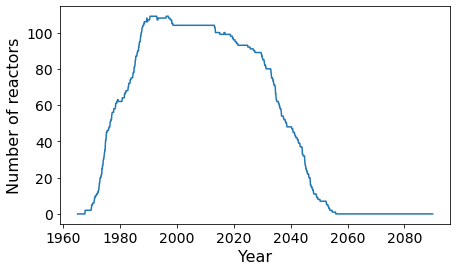

In [4]:
# Reactor Deployment
s1_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
s1_reactors = tm.rx_commission_decommission(s1_outfile, s1_nonlwr)
s1_reactors = tm.add_year(s1_reactors)

plt.figure(figsize=(7,4))
plt.plot(s1_reactors['Year'], s1_reactors['lwr_total'])
plt.xlabel('Year', size=16)
plt.ylabel('Number of reactors', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_reactors.pdf')

In [5]:
print(s1_reactors['lwr_total'].max())
print(s1_reactors['lwr_total'][721])
print(s1_reactors[['lwr_total','Year']][1087:1095])

109.0
92.0
Prototype  lwr_total     Year
1087             1.0  2055.58
1088             1.0  2055.67
1089             1.0  2055.75
1090             0.0  2055.83
1091             0.0  2055.92
1092             0.0  2056.00
1093             0.0  2056.08
1094             0.0  2056.17


/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


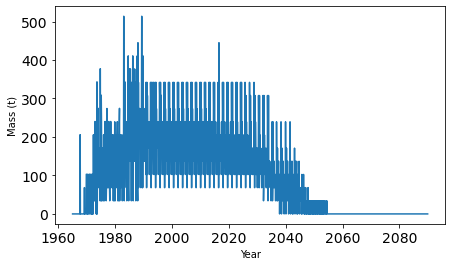

In [6]:
#Uranium resources sent to reactors
s1_transactions = pd.read_csv('current_transactions.csv', 
                                   usecols = ['Time','Commodity', 'Units',
                                             'Quantity','Prototype'])
s1_uox = tm.commodity_mass_traded(s1_transactions, 'fresh_uox')
plt.figure(figsize=(7,4))
plt.plot(s1_uox['Year'], s1_uox['Quantity']/1000)
#plt.legend(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title('Mass of uranium supplied to all reactors')
plt.savefig('figures/s1_fuelsupply.pdf')

In [ ]:
print(s1_uox['Quantity'].max())
print(s1_uox['Quantity'].mean())
print(s1_uox['Quantity'][721:1089].mean())

In [ ]:
#Natural uranium needed
s1_tails = tm.calculate_tails(s1_uox['Quantity'], leu_p, x_t, x_f)
s1_feed = tm.calculate_feed(s1_uox['Quantity'], s1_tails)

plt.plot(s1_uox['Year'], s1_feed/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (t)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_feed.pdf')

In [ ]:
print(s1_feed.max())
print(s1_feed.mean())
print(s1_feed[721:1089].mean())

In [ ]:
# SWU capacity 
s1_swu = tm.calculate_SWU(s1_uox['Quantity'], leu_p, s1_tails, x_t, s1_feed, x_f)
plt.plot(s1_uox["Year"], s1_swu)
plt.xlabel('Year')
plt.ylabel('SWU (kg-SWU)')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figures/s1_swu.pdf')

In [ ]:
print(s1_swu.max())
print(s1_swu.mean())
print(s1_swu[721:1089].mean())

In [ ]:
# waste discharged
s1_waste = tm.commodity_mass_traded(s1_transactions, 'spent_uox')

plt.plot(s1_waste['Year'], s1_waste['Quantity']/1000)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mass (t)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('figures/s1_waste.pdf')

In [ ]:
print(s1_waste['Quantity'].max())
print(s1_waste['Quantity'].mean())
print(s1_waste['Quantity'][721:1089].mean())

## No growth scenarios

In [7]:
s2_outfile = "../outputs/mmr_nogrowth.sqlite"
s3_outfile = "../outputs/xe100_nogrowth.sqlite"
s4_outfile = "../outputs/xe100_mmr_nogrowth.sqlite"
s5_outfile = "../outputs/mmr_voygr_nogrowth.sqlite"
s6_outfile = "../outputs/xe100_voygr_nogrowth.sqlite"
s7_outfile = "../outputs/xe100_mmr_voygr_nogrowth.sqlite"

In [8]:
# Reactor Deployment
s2_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'MMR_enter', 'MMR_exit']
s3_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100_enter', 'Xe-100_exit']
s4_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100', 'MMR']
s5_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'MMR_enter', 'MMR_exit']
s6_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100', 'VOYGR']
s7_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'Xe-100', 'MMR']
s2_reactors = tm.rx_commission_decommission(s2_outfile, s2_nonlwr)
s2_reactors = tm.add_year(s2_reactors)
s2_reactors['mmr_total'] = (s2_reactors['MMR_enter'] 
                                      + s2_reactors['MMR_exit']).cumsum()
s3_reactors = tm.rx_commission_decommission(s3_outfile, s3_nonlwr)
s3_reactors = tm.add_year(s3_reactors)
s3_reactors['xe_total'] = (s3_reactors['Xe-100_enter'] 
                                      + s3_reactors['Xe-100_exit']).cumsum()

s4_reactors = tm.rx_commission_decommission(s4_outfile, s4_nonlwr)
s4_reactors = tm.add_year(s4_reactors)
s4_reactors['xe_total'] = s4_reactors['Xe-100'].cumsum()
s4_reactors['mmr_total'] = s4_reactors['MMR'].cumsum() 
s4_reactors['advrx_enter'] = (s4_reactors['MMR'] + s4_reactors['Xe-100'])
s4_reactors['advrx_total'] = s4_reactors['advrx_enter'].cumsum()

s5_reactors = tm.rx_commission_decommission(s5_outfile, s5_nonlwr)
s5_reactors = tm.add_year(s5_reactors)
#s5_reactors['voygr_total'] = s4_reactors['VOYGR'].cumsum()
s5_reactors['mmr_total'] = (s5_reactors['MMR_enter'] + s5_reactors['MMR_exit']).cumsum() 
s5_reactors['advrx_enter'] = s5_reactors['MMR_enter'] #+ s5_reactors['VOYGR'])
s5_reactors['advrx_total'] = s5_reactors['advrx_enter'].cumsum()

#s6_reactors = tm.rx_commission_decommission(s6_outfile, s6_nonlwr)
#s6_reactors = tm.add_year(s6_reactors)
#s6_reactors['xe_total'] = s6_reactors['Xe-100'].cumsum()
#s6_reactors['voygr_total'] = s6_reactors['VOYGR'].cumsum() 
#s6_reactors['advrx_enter'] = (s6_reactors['VOYGR'] + s6_reactors['Xe-100'])
#s6_reactors['advrx_total'] = s6_reactors['advrx_enter'].cumsum()

s7_reactors = tm.rx_commission_decommission(s7_outfile, s7_nonlwr)
s7_reactors = tm.add_year(s7_reactors)
s7_reactors['xe_total'] = s7_reactors['Xe-100'].cumsum()
s7_reactors['mmr_total'] = s7_reactors['MMR'].cumsum() 
#s7_reactors['voygr_total'] = s7_reactors['VOYGR'].cumsum()
s7_reactors['advrx_enter'] = s7_reactors['MMR'] + s7_reactors['Xe-100'] #+ s7_reactors['VOYGR']
s7_reactors['advrx_total'] = s7_reactors['advrx_enter'].cumsum()

AttributeError: 'NoneType' object has no attribute 'set_index'

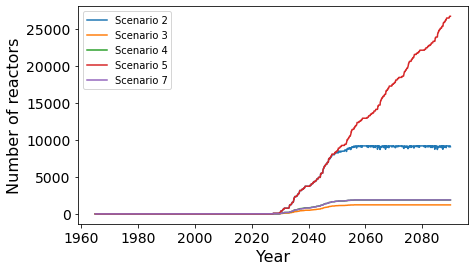

In [17]:
time = np.linspace(1965,2089, 65)
plt.figure(figsize=(7,4))
plt.plot(s2_reactors['Year'], s2_reactors['mmr_total'], label='Scenario 2')
plt.plot(s3_reactors['Year'], s3_reactors['xe_total'], label='Scenario 3')
plt.plot(s4_reactors['Year'], s4_reactors['advrx_total'], label='Scenario 4')
plt.plot(s5_reactors['Year'], s5_reactors['advrx_total'], label='Scenario 5')
#plt.plot(s6_reactors['Year'], s6_reactors['advrx_total'], label='Scenario 6')
plt.plot(s7_reactors['Year'], s7_reactors['advrx_total'], label='Scenario 7')
plt.xlabel('Year', size=16)
plt.ylabel('Number of reactors', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/nogrowth_reactors.pdf')

In [15]:
print('Max total in S2:', s2_reactors['mmr_total'].max())
print('MMRs added in S2:', s2_reactors['MMR_enter'].max())
print('Max Xe-100 total in S3:', s3_reactors['xe_total'].max())
print('Max Xe-100 added in S3:', s3_reactors['Xe-100_enter'].max())
print('Max MMR total in S4:', s4_reactors['mmr_total'].max())
print('Max MMR added in S4:', s4_reactors['MMR'].max())
print('Max Xe-100 total in S4:', s4_reactors['xe_total'].max())
print('Max Xe-100 added in S4:', s4_reactors['Xe-100'].max())
print('Max Adv Rx total in S4:', s4_reactors['advrx_total'].max())
print('Max Adv Rx added in S4:', s4_reactors['advrx_enter'].max())

Max total in S2: 9182.0
MMRs added in S2: 378
Max Xe-100 total in S3: 1225.0
Max Xe-100 added in S3: 50
Max MMR total in S4: 752
Max MMR added in S4: 31
Max Xe-100 total in S4: 1124
Max Xe-100 added in S4: 50
Max Adv Rx total in S4: 1876
Max Adv Rx added in S4: 56
